Which cuisine types have the highest average delivery fee per city?"

In [3]:
import os

os.chdir('C:/Users/esram/OneDrive/Desktop/esrabecode/delivery-market-analysis')

os.getcwd()

'C:\\Users\\esram\\OneDrive\\Desktop\\esrabecode\\delivery-market-analysis'

In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('data/takeaway.db')

query = """

WITH cuisine_avg AS (
    SELECT 
        r.city,
        c.name AS cuisine_type,
        AVG(r.deliveryFee) AS avg_delivery_fee,
        COUNT(DISTINCT r.primarySlug) AS restaurant_count
    FROM restaurants r
    JOIN categories c
        ON r.primarySlug = c.restaurant_id
    WHERE 
        LOWER(c.name) LIKE '%pizza%'
        OR LOWER(c.name) LIKE '%sushi%'
        OR LOWER(c.name) LIKE '%indian%'
        OR LOWER(c.name) LIKE '%turkish%'
        OR LOWER(c.name) LIKE '%thai%'
        OR LOWER(c.name) LIKE '%italian%'
        OR LOWER(c.name) LIKE '%chinese%'
        OR LOWER(c.name) LIKE '%kebab%'
        OR LOWER(c.name) LIKE '%kebap%'
        OR LOWER(c.name) LIKE '%burger%'
        OR LOWER(c.name) LIKE '%mexican%'
        OR LOWER(c.name) LIKE '%japanese%'
        OR LOWER(c.name) LIKE '%mediterranean%'
        OR LOWER(c.name) LIKE '%kip%'
    GROUP BY 
        r.city,
        c.name
    HAVING COUNT(DISTINCT r.primarySlug) >= 5
)

SELECT 
    ca.city,
    ca.cuisine_type,
    ca.avg_delivery_fee,
    ca.restaurant_count
FROM cuisine_avg ca
JOIN (
    SELECT city, MAX(avg_delivery_fee) AS max_fee
    FROM cuisine_avg
    GROUP BY city
) m
    ON ca.city = m.city AND ca.avg_delivery_fee = m.max_fee
ORDER BY ca.avg_delivery_fee DESC;

"""

delivery_fee_df = pd.read_sql_query(query, conn)
delivery_fee_df.head(10)


,city,cuisine_type,avg_delivery_fee,restaurant_count
0,Ixelles,Burgers,5.503958,5
1,Gent,Hamburgers,5.122941,10
2,Antwerpen,Kip,5.003235,7
3,Anderlecht,Pizzas,4.260795,8
4,Bruxelles,Burgers,4.194674,30
5,Uccle,Sushi,4.194000,5
6,Laeken,Burgers,4.065366,9
7,Berchem,Burgers,3.999524,5
8,Brugge,Burgers,3.779937,11
9,Oostende,Burgers,3.617083,20


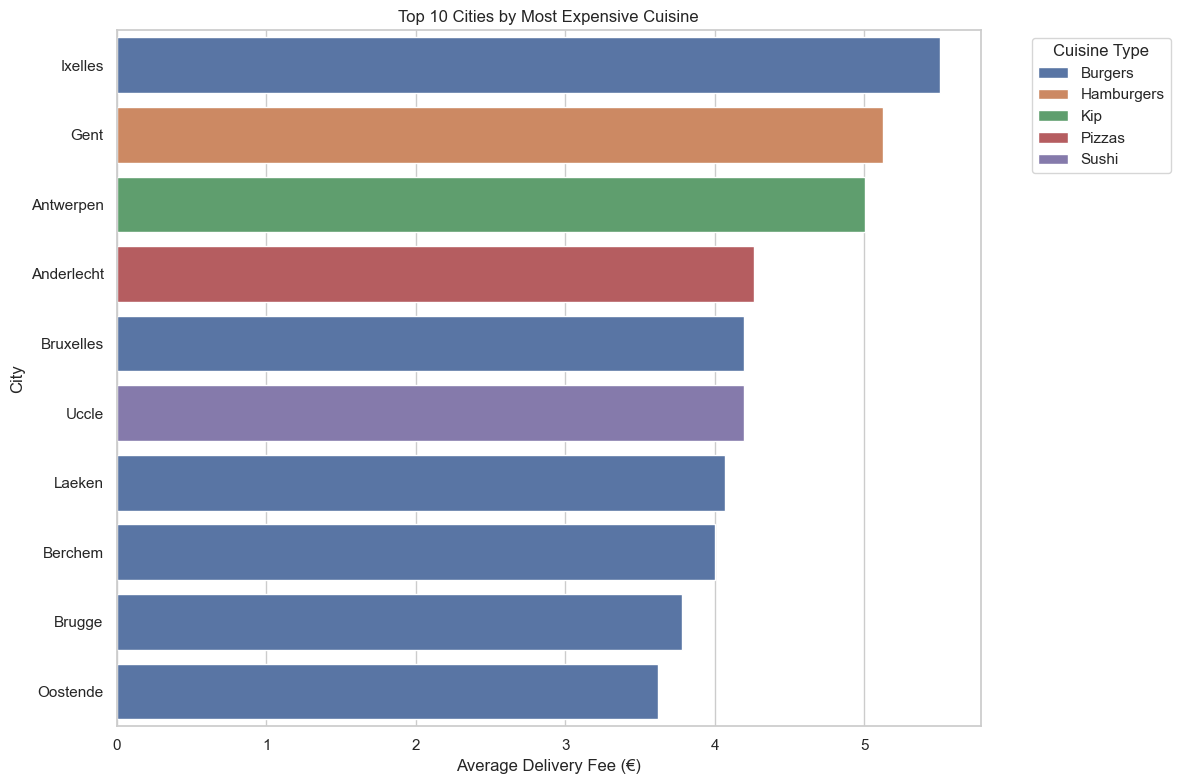

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

top_10 = delivery_fee_df.sort_values("avg_delivery_fee", ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_10,
    x="avg_delivery_fee",
    y="city",
    hue="cuisine_type",
    dodge=False
)

plt.title("Top 10 Cities by Most Expensive Cuisine")
plt.xlabel("Average Delivery Fee (€)")
plt.ylabel("City")
plt.legend(title="Cuisine Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [14]:
from pptx import Presentation
from pptx.util import Inches, Pt

# Yeni presentation
prs = Presentation()

# Slide başlıkları ve metinleri
slides_content = [
    ("Delivery Market Analysis", 
     "Welcome everyone. This presentation covers the analysis of the delivery market, focusing on restaurants, menu items, and delivery patterns. Our goal is to uncover actionable insights for both consumers and restaurant partners."),
    
    ("Mission Objectives", 
     "Our mission is to enhance data engineering, SQL querying, geospatial analysis, and data storytelling skills. We aim to extract actionable insights from delivery data, uncovering trends and patterns that support strategic decisions."),
    
    ("Key Business Questions", 
     "We focused on nine main questions, including price distribution, restaurant density, top pizza restaurants, mapping favorite dishes, delivery coverage, vegetarian options, and the World Hummus Order. Additionally, we explored two original questions on price-to-rating ratio and cuisine-specific delivery fees."),
    
    ("Price Distribution of Menu Items", 
     "Understanding menu item prices helps us identify market trends and potential pricing gaps. We built a histogram to visualize the distribution of prices across all items. This allows us to see which price ranges dominate and which items are premium."),
    
    ("Distribution of Restaurants per Location", 
     "Knowing restaurant density informs coverage and competition in each area. We aggregated restaurants by city and postal code and visualized them on a map. This highlighted high-density zones and potential underserved regions for market expansion."),
    
    ("Top 10 Pizza Restaurants by Rating", 
     "Pizza is a highly competitive category. We identified the top 10 pizza restaurants by rating and rating count. This table shows the restaurant name, city, rating, delivery fee, and main pizza category, helping consumers and partners recognize top performers."),
    
    ("Map: Kapsalons / Favorite Dish Locations", 
     "Customers often seek specific dishes like kapsalons. We aggregated restaurants offering this dish, calculated the average price, and mapped their locations. The map highlights both popular locations and price variations across cities."),
    
    ("Delivery Dead Zones", 
     "Some areas have very few restaurants, creating delivery dead zones. We identified postal codes with fewer than 10 restaurants and mapped them. This visualization reveals underserved regions that could benefit from new restaurant entries."),
    
    ("Vegetarian & Vegan Availability", 
     "Plant-based options are important for many customers. We filtered menu items containing ‘veg’, ‘vegetarian’, or ‘vegan’ and aggregated their availability by restaurant and city. The map shows which cities offer the most vegetarian and vegan options, supporting customer choice."),
    
    ("World Hummus Order (WHO)", 
     "Hummus is a signature item across many restaurants. We identified the top 3 hummus-serving restaurants based on rating and number of hummus items. This highlights specialty restaurants and their cities, showcasing the leaders in hummus offerings."),
    
    ("Original Question – Highest Avg Delivery Fee per City", 
     "Delivery costs vary across cities and cuisines. We calculated the average delivery fee per cuisine type and city. This analysis highlights which cuisines command higher delivery fees and can inform pricing and market strategies."),
    
    ("Price-to-Rating Ratio", 
     "Customers seek value for money, combining quality and cost. We created a ‘true price/rating’ metric that incorporates menu price, delivery fee, and rating. The scatter plot shows restaurants offering the best value, guiding customer decisions and competitive analysis.")
]

# Her bir slide için
for title, content in slides_content:
    slide_layout = prs.slide_layouts[1]  # Title + Content layout
    slide = prs.slides.add_slide(slide_layout)
    slide.shapes.title.text = title
    slide.placeholders[1].text = content

# Kaydet
prs.save("delivery_market_analysis.pptx")
print("PowerPoint file created: delivery_market_analysis.pptx")


PowerPoint file created: delivery_market_analysis.pptx
